Residual learning using ASCAT and winds from ERA5

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-05-26 09:39:53.154047: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_9000_images_era5.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


In [7]:
df['residuals'] = (- df['UWr'] * df['rhoair']) - df['stress']
e = df['residuals']

Text(0, 0.5, 'Residuals')

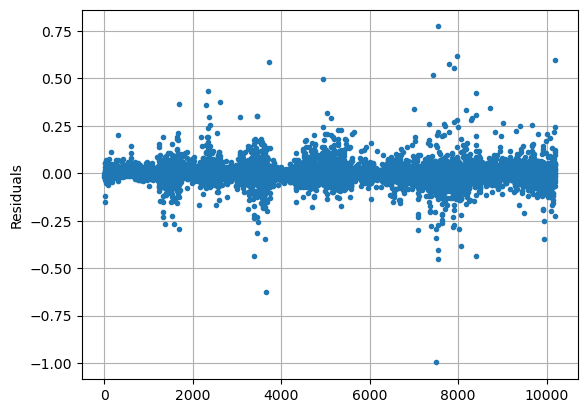

In [8]:
plt.plot(e, '.')
plt.grid()
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

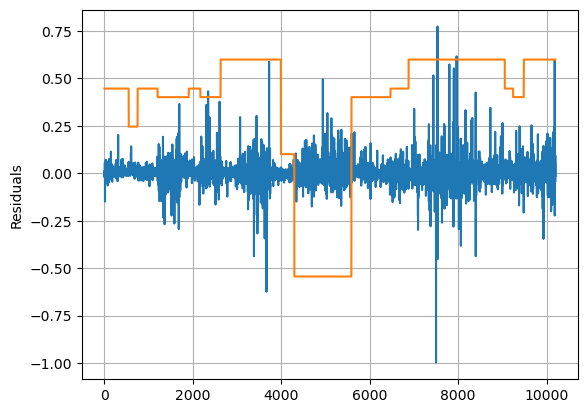

In [9]:
plt.plot(e)
plt.plot(df['lat']/100)
plt.grid()
plt.ylabel('Residuals')

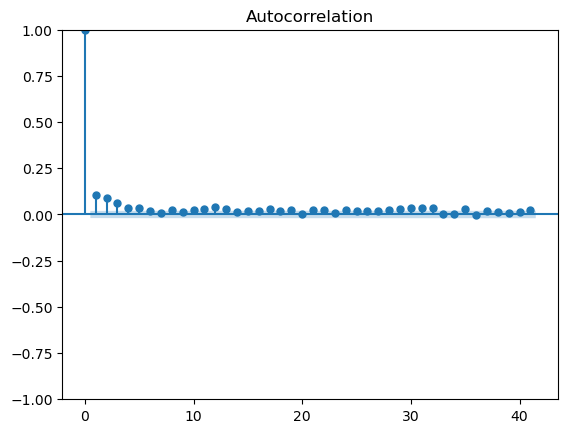

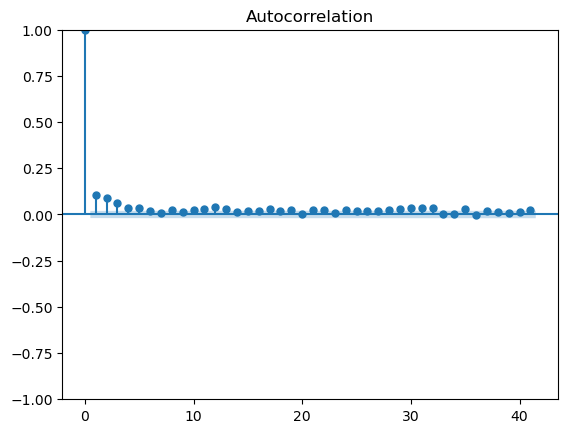

In [10]:

# import the required modules
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
 
# plot the auto correlation
plot_acf(e)

In [11]:
df = df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10,residuals
8291,-0.012150,-0.032903,266.100000,2491.995719,1031.113303,1032.385986,4.375262,4.390499,93.076403,93.066660,...,99.329994,145.099991,52.219997,41.040001,52.239998,20210402T110300Z,20210402T124458.125000Z,6.045154,7.037160,0.039635
3812,0.009946,-0.040725,325.699998,2486.762542,1002.355768,1003.579007,5.421004,5.432089,90.952000,90.829780,...,60.669998,15.929999,51.360001,40.430000,51.329998,20170612T204500Z,20170612T222658.125000Z,-6.122303,-9.317768,-0.001970
2220,-0.098607,-0.048255,292.959996,2465.628629,1012.968245,1014.174503,5.485714,5.685436,62.488897,60.825029,...,101.400002,146.589996,37.619999,28.219999,37.610001,20171118T141200Z,20171118T155058.125000Z,5.725120,4.448625,0.041442
4495,0.547509,0.022966,337.584998,2482.259844,993.137445,994.339005,6.040936,6.061799,86.591240,86.278805,...,117.959999,162.399994,59.059998,47.939999,58.859997,20160129T130900Z,20160129T144758.125000Z,5.358885,-13.263199,0.030845
1173,0.085739,0.094400,357.980002,2471.653475,1017.458491,1018.669986,8.439131,8.454612,95.247900,95.275105,...,100.189995,145.770004,48.719997,37.790001,48.719997,20160916T174500Z,20160916T192358.125000Z,1.669808,-3.258454,-0.000639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7832,-0.012150,-0.032903,272.535001,2491.064483,1016.776770,1018.032996,3.411718,3.462474,73.038053,72.278851,...,95.549995,141.940002,63.939999,52.369999,63.719997,20210118T120300Z,20210118T134158.125000Z,6.045154,7.037160,-0.015636
9509,0.065996,-0.026629,273.849998,2476.814342,1011.035600,1012.250504,6.481914,6.540536,83.244302,82.543787,...,101.309998,146.940002,46.489998,35.770000,46.469997,20190816T122700Z,20190816T140858.125000Z,4.793102,-5.152116,-0.008123
2283,0.016743,-0.032014,288.435002,2467.407841,1014.254360,1015.478500,3.801912,4.031039,56.148297,53.812369,...,-69.070000,-113.919998,61.529999,50.469997,61.609997,20171207T151500Z,20171207T165358.125000Z,9.488249,-0.378240,-0.001118
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479,-0.045372


In [24]:
c = df['stress']
obs = - df['UWr'] * df['rhoair']

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [12]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [13]:
df.shape

(10200, 68)

In [14]:
df.shape[0]*0.8

8160.0

In [15]:
split_idx = 8160

In [16]:
df['residuals'] = (- df['UWr'] * df['rhoair']) - df['stress']
e = df['residuals']

Text(0, 0.5, 'Residuals')

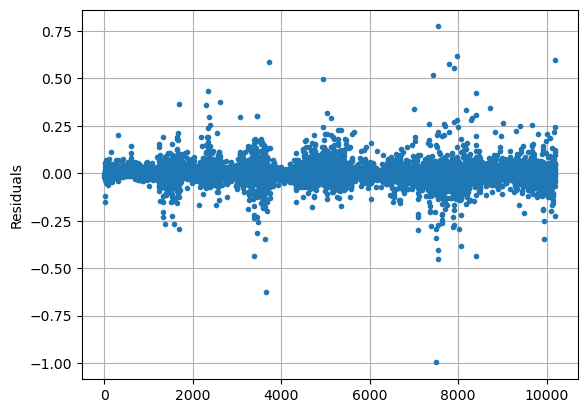

In [17]:
plt.plot(e, '.')
plt.grid()
plt.ylabel('Residuals')

# Prepare features and labels

In [18]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft', 
    'u10', 'v10'
]

In [19]:
x = df[predictor_variables]
x

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,u10,v10
8291,-21.329966,-20.314684,-20.953699,53.500000,99.329994,145.099991,52.219997,41.040001,52.239998,6.045154,7.037160
3812,-20.943676,-13.976841,-16.550650,105.349998,60.669998,15.929999,51.360001,40.430000,51.329998,-6.122303,-9.317768
2220,-13.540611,-10.180238,-18.316372,56.160000,101.400002,146.589996,37.619999,28.219999,37.610001,5.725120,4.448625
4495,-20.408886,-14.060665,-14.675045,73.409996,117.959999,162.399994,59.059998,47.939999,58.859997,5.358885,-13.263199
1173,-18.629818,-16.368279,-17.564482,54.480000,100.189995,145.770004,48.719997,37.790001,48.719997,1.669808,-3.258454
...,...,...,...,...,...,...,...,...,...,...,...
7832,-27.140862,-23.478655,-28.449240,49.070000,95.549995,141.940002,63.939999,52.369999,63.719997,6.045154,7.037160
9509,-22.741312,-14.892164,-18.181908,55.559998,101.309998,146.940002,46.489998,35.770000,46.469997,4.793102,-5.152116
2283,-22.848459,-16.476969,-19.476072,-24.299999,-69.070000,-113.919998,61.529999,50.469997,61.609997,9.488249,-0.378240
10196,-20.899197,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,4.111861,8.730479


In [20]:
y = e

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [21]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [22]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [25]:
c_train = c[:split_idx]
c_test = c[split_idx:]

In [26]:
obs_train = obs[:split_idx]
obs_test = obs[split_idx:]

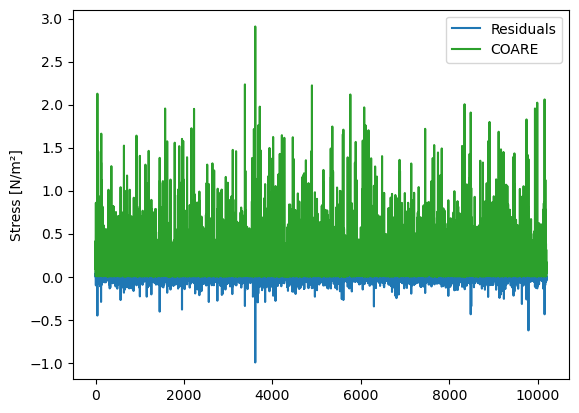

In [27]:

plt.plot(y.values, label='Residuals')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [28]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [29]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [30]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [31]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-05-26 09:40:56.708770: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-26 09:40:56.709046: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-26 09:40:56.709055: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-26 09:40:56.709072: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ppi-r8login-b2.int.met.no): /proc/driver/nvidia/version does not exist
2023-05-26 09:40:56.709254: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations,

Epoch 1/500
179/179 [==============================] - 1s 5ms/step - loss: 2.2267 - mean_absolute_error: 1.0723 - val_loss: 1.3380 - val_mean_absolute_error: 0.8033
Epoch 2/500
179/179 [==============================] - 0s 635us/step - loss: 1.6120 - mean_absolute_error: 0.8080 - val_loss: 1.0464 - val_mean_absolute_error: 0.6703
Epoch 3/500
179/179 [==============================] - 0s 610us/step - loss: 1.3704 - mean_absolute_error: 0.7024 - val_loss: 0.9275 - val_mean_absolute_error: 0.6025
Epoch 4/500
179/179 [==============================] - 0s 596us/step - loss: 1.1855 - mean_absolute_error: 0.6399 - val_loss: 0.8769 - val_mean_absolute_error: 0.5683
Epoch 5/500
179/179 [==============================] - 0s 583us/step - loss: 1.1759 - mean_absolute_error: 0.6002 - val_loss: 0.8516 - val_mean_absolute_error: 0.5503
Epoch 6/500
179/179 [==============================] - 0s 586us/step - loss: 1.0335 - mean_absolute_error: 0.5802 - val_loss: 0.8378 - val_mean_absolute_error: 0.5386


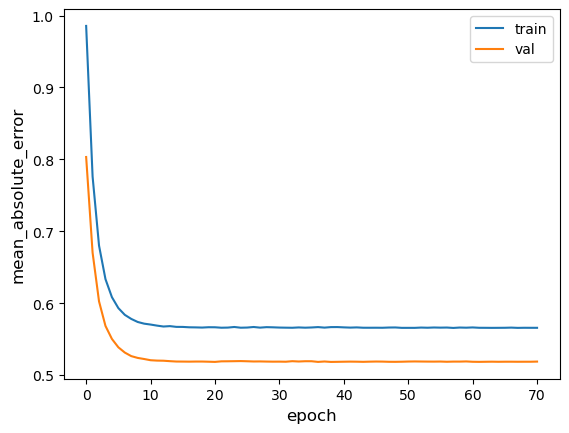

64/64 [==============================] - 0s 368us/step - loss: 1.3528 - mean_absolute_error: 0.5790
Test accuracy 0.5789554715156555
Test loss 1.352835774421692


In [34]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [35]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [36]:
np.mean(y_test)

-0.0018541343979944635

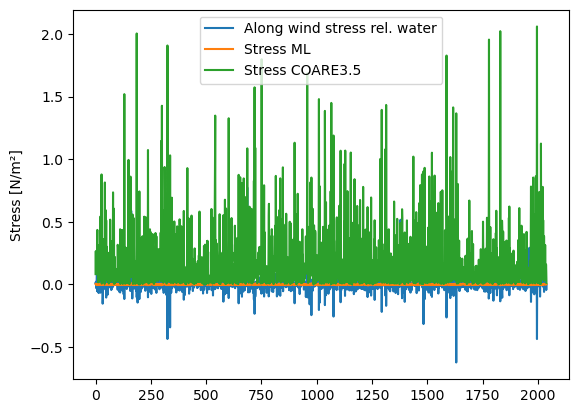

In [37]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

Text(0, 0.5, 'Predicted residuals [N/m²]')

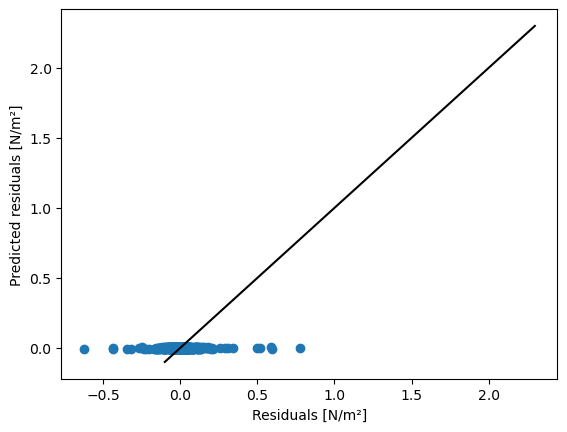

In [38]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

In [39]:
obs_test.values.shape

(2040,)

In [40]:
y_test_pred[:, 0].shape

(2040,)

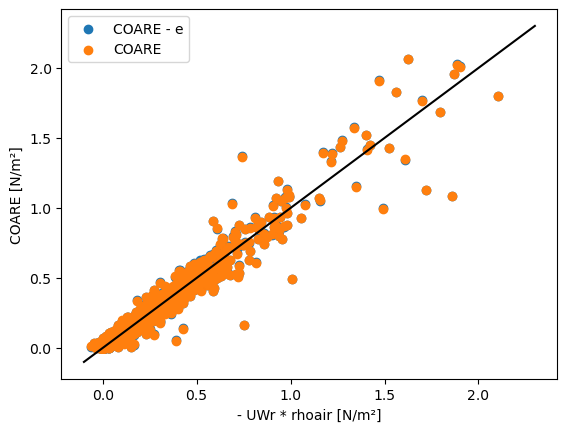

In [41]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [42]:
rmse(y_test.values, y_test_pred)

0.05631982114239977

In [43]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

0.05657109548404238

In [44]:
rmse(obs_test.values, c_test)

0.056241578532168816

## Correlation

In [45]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.08620801],
       [0.08620801, 1.        ]])

In [46]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

array([[1.        , 0.97364887],
       [0.97364887, 1.        ]])

In [47]:
np.corrcoef(obs_test.values, c_test)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

# Other experiments

In [48]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [49]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [50]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 1.6597 - mean_absolute_error: 0.8244 - val_loss: 0.9039 - val_mean_absolute_error: 0.5846
Epoch 2/500
179/179 [==============================] - 0s 758us/step - loss: 1.1507 - mean_absolute_error: 0.6464 - val_loss: 0.8554 - val_mean_absolute_error: 0.5546
Epoch 3/500
179/179 [==============================] - 0s 733us/step - loss: 1.0863 - mean_absolute_error: 0.6083 - val_loss: 0.8432 - val_mean_absolute_error: 0.5483
Epoch 4/500
179/179 [==============================] - 0s 728us/step - loss: 1.1077 - mean_absolute_error: 0.6102 - val_loss: 0.8321 - val_mean_absolute_error: 0.5374
Epoch 5/500
179/179 [==============================] - 0s 725us/step - loss: 1.2466 - mean_absolute_error: 0.6001 - val_loss: 0.8247 - val_mean_absolute_error: 0.5310
Epoch 6/500
179/179 [==============================] - 0s 725us/step - loss: 1.1019 - mean_absolute_error: 0.5942 - val_loss: 0.8187 - val_mean_absolute_error: 0.5244


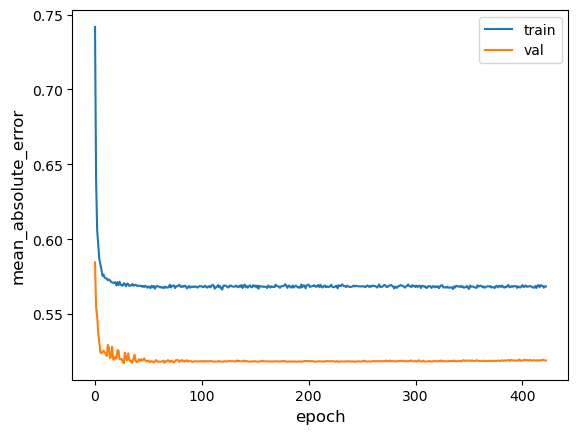

64/64 [==============================] - 0s 332us/step - loss: 1.3542 - mean_absolute_error: 0.5795
Test accuracy 0.5795422792434692
Test loss 1.3542382717132568


In [51]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [52]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

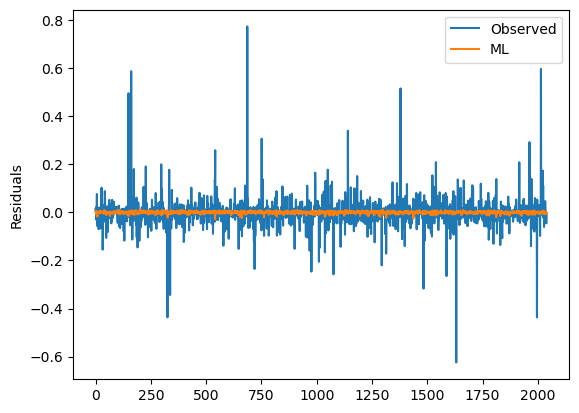

In [53]:
plt.plot(y_test.values, label='Observed')
plt.plot(y_test_pred, label='ML')
plt.ylabel('Residuals')
plt.legend()

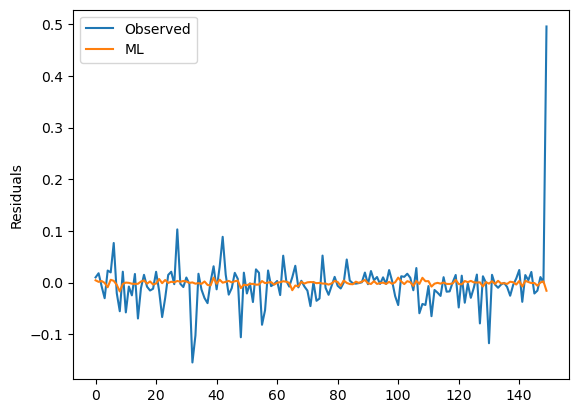

In [54]:
plt.plot(y_test.values[:150], label='Observed')
plt.plot(y_test_pred[:150], label='ML')
plt.ylabel('Residuals')
plt.legend()

Text(0, 0.5, 'Predicted residuals [N/m²]')

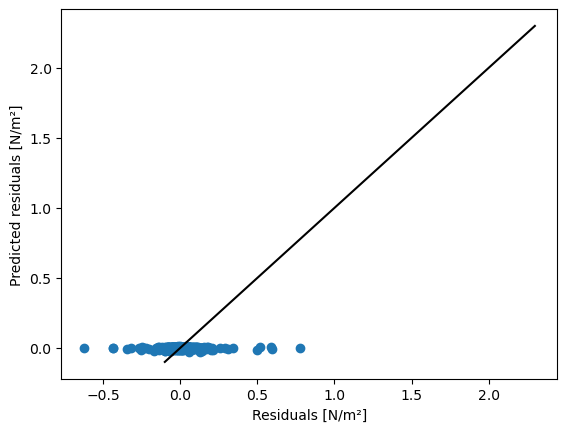

In [55]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

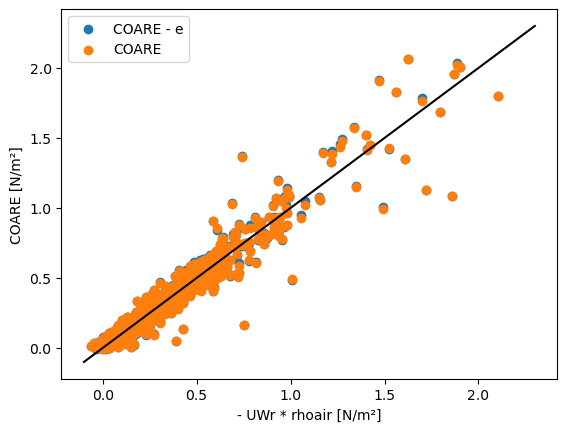

In [56]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [57]:
rmse(y_test.values, y_test_pred)

0.05640447134762844

In [58]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

0.056717286353263625

In [59]:
rmse(obs_test.values, c_test)

0.056241578532168816

## Correlation

In [60]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.07190123],
       [0.07190123, 1.        ]])

In [61]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

array([[1.        , 0.97357354],
       [0.97357354, 1.        ]])

In [62]:
np.corrcoef(obs_test.values, c_test)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [63]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [64]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [65]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 2.8245 - mean_absolute_error: 1.2530 - val_loss: 1.0068 - val_mean_absolute_error: 0.6601
Epoch 2/500
179/179 [==============================] - 0s 719us/step - loss: 1.9733 - mean_absolute_error: 0.9183 - val_loss: 0.9029 - val_mean_absolute_error: 0.5938
Epoch 3/500
179/179 [==============================] - 0s 732us/step - loss: 1.3947 - mean_absolute_error: 0.7904 - val_loss: 0.8654 - val_mean_absolute_error: 0.5651
Epoch 4/500
179/179 [==============================] - 0s 749us/step - loss: 1.4340 - mean_absolute_error: 0.7297 - val_loss: 0.8513 - val_mean_absolute_error: 0.5517
Epoch 5/500
179/179 [==============================] - 0s 752us/step - loss: 1.3183 - mean_absolute_error: 0.7055 - val_loss: 0.8423 - val_mean_absolute_error: 0.5439
Epoch 6/500
179/179 [==============================] - 0s 741us/step - loss: 1.1795 - mean_absolute_error: 0.6680 - val_loss: 0.8352 - val_mean_absolute_error: 0.5359


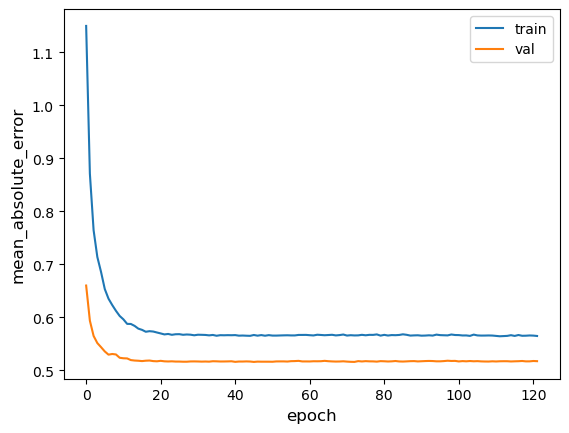

64/64 [==============================] - 0s 340us/step - loss: 33.7036 - mean_absolute_error: 5.3209
Test accuracy 5.320878028869629
Test loss 33.703575134277344


In [66]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [69]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

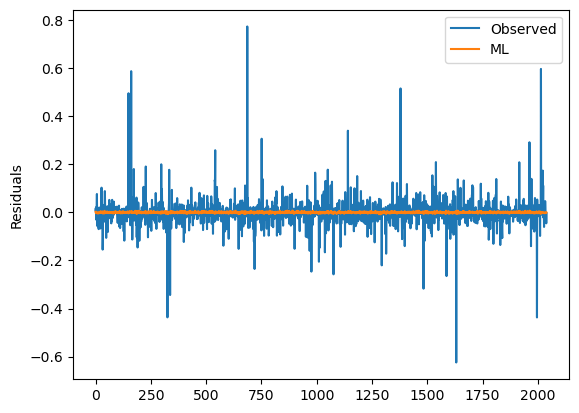

In [70]:
plt.plot(y_test.values, label='Observed')
plt.plot(y_test_pred, label='ML')
plt.ylabel('Residuals')
plt.legend()

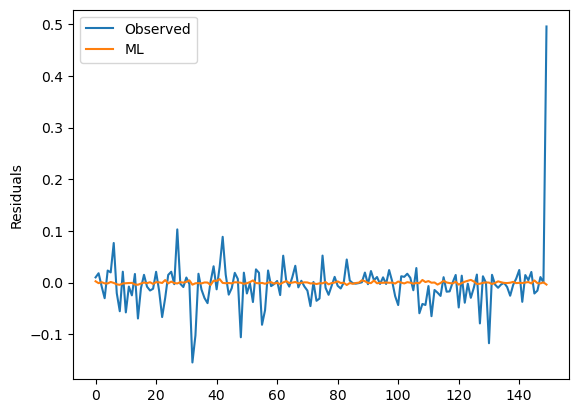

In [71]:
plt.plot(y_test.values[:150], label='Observed')
plt.plot(y_test_pred[:150], label='ML')
plt.ylabel('Residuals')
plt.legend()

Text(0, 0.5, 'Predicted residuals [N/m²]')

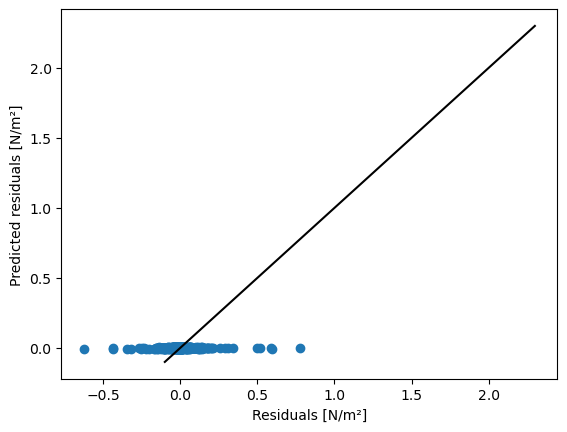

In [72]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

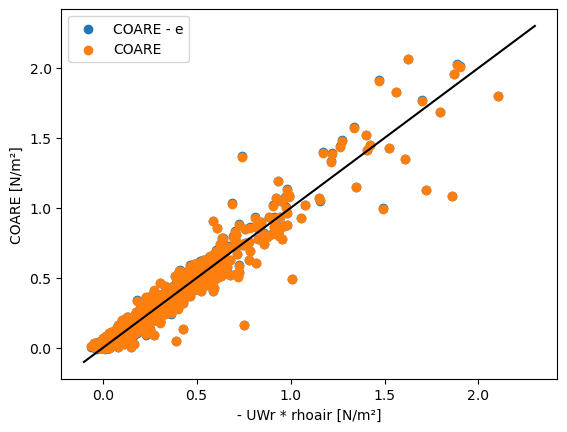

In [73]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [74]:
rmse(y_test.values, y_test_pred)

0.056293942051662424

In [75]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

0.056534586756392106

In [76]:
rmse(obs_test.values, c_test)

0.056241578532168816

## Correlation

In [77]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.09742318],
       [0.09742318, 1.        ]])

In [78]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

array([[1.        , 0.97368799],
       [0.97368799, 1.        ]])

In [79]:
np.corrcoef(obs_test.values, c_test)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [80]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [81]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [82]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 2.1261 - mean_absolute_error: 1.0400 - val_loss: 0.8969 - val_mean_absolute_error: 0.5895
Epoch 2/500
179/179 [==============================] - 0s 720us/step - loss: 1.3985 - mean_absolute_error: 0.8003 - val_loss: 0.8441 - val_mean_absolute_error: 0.5459
Epoch 3/500
179/179 [==============================] - 0s 721us/step - loss: 1.1004 - mean_absolute_error: 0.6851 - val_loss: 0.8275 - val_mean_absolute_error: 0.5334
Epoch 4/500
179/179 [==============================] - 0s 736us/step - loss: 1.1695 - mean_absolute_error: 0.6587 - val_loss: 0.8226 - val_mean_absolute_error: 0.5276
Epoch 5/500
179/179 [==============================] - 0s 721us/step - loss: 1.1242 - mean_absolute_error: 0.6298 - val_loss: 0.8171 - val_mean_absolute_error: 0.5226
Epoch 6/500
179/179 [==============================] - 0s 735us/step - loss: 1.0413 - mean_absolute_error: 0.5949 - val_loss: 0.8162 - val_mean_absolute_error: 0.5206


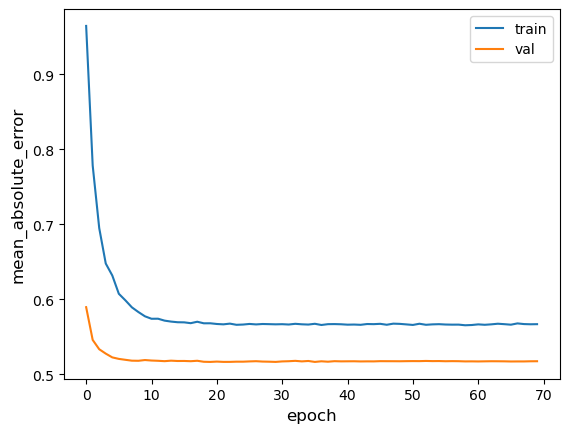

64/64 [==============================] - 0s 372us/step - loss: 1.3495 - mean_absolute_error: 0.5776
Test accuracy 0.5775827765464783
Test loss 1.349495768547058


In [95]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [96]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

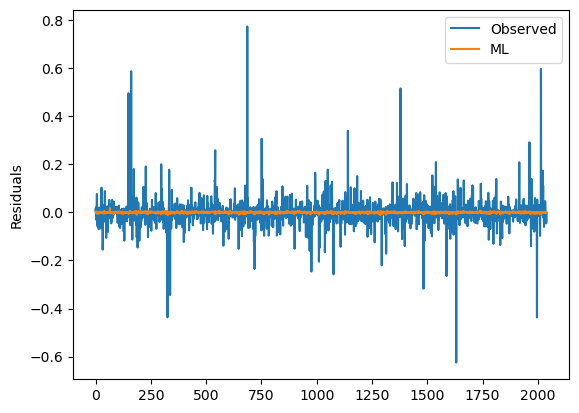

In [97]:
plt.plot(y_test.values, label='Observed')
plt.plot(y_test_pred, label='ML')
plt.ylabel('Residuals')
plt.legend()

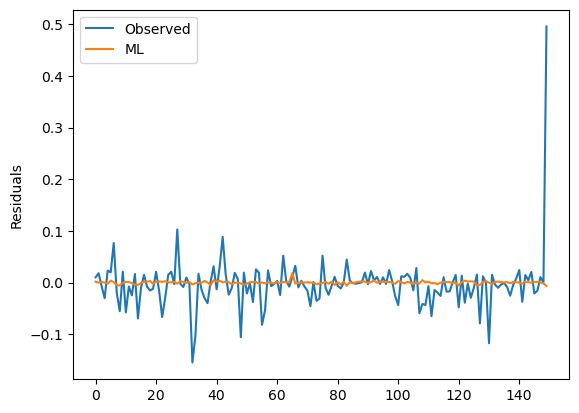

In [98]:
plt.plot(y_test.values[:150], label='Observed')
plt.plot(y_test_pred[:150], label='ML')
plt.ylabel('Residuals')
plt.legend()

Text(0, 0.5, 'Predicted residuals [N/m²]')

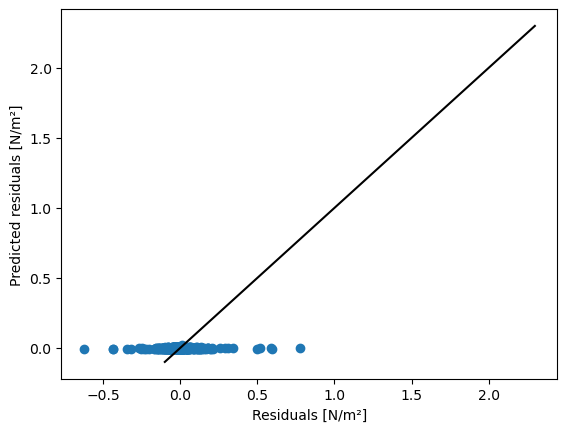

In [99]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

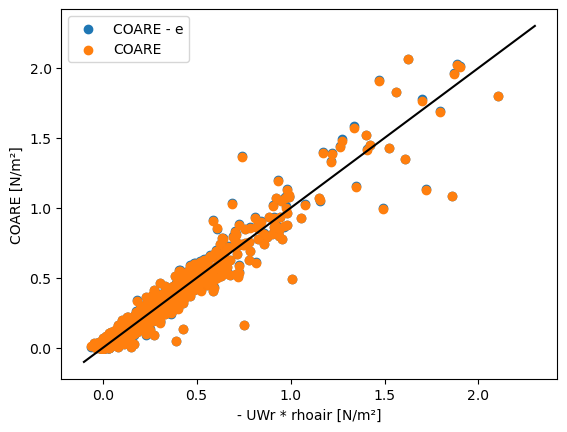

In [100]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [101]:
rmse(y_test.values, y_test_pred)

0.05629803310304814

In [102]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

0.056595938582031796

In [103]:
rmse(obs_test.values, c_test)

0.056241578532168816

## Correlation

In [104]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.12082556],
       [0.12082556, 1.        ]])

In [105]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

array([[1.        , 0.97369181],
       [0.97369181, 1.        ]])

In [106]:
np.corrcoef(obs_test.values, c_test)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [107]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [108]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [109]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 3s 12ms/step - loss: 3.2960 - mean_absolute_error: 1.2790 - val_loss: 0.9580 - val_mean_absolute_error: 0.6570
Epoch 2/500
179/179 [==============================] - 2s 12ms/step - loss: 1.4555 - mean_absolute_error: 0.8342 - val_loss: 0.8890 - val_mean_absolute_error: 0.5871
Epoch 3/500
179/179 [==============================] - 2s 12ms/step - loss: 1.5855 - mean_absolute_error: 0.7582 - val_loss: 0.8587 - val_mean_absolute_error: 0.5550
Epoch 4/500
179/179 [==============================] - 2s 12ms/step - loss: 1.3167 - mean_absolute_error: 0.7111 - val_loss: 0.8735 - val_mean_absolute_error: 0.5637
Epoch 5/500
179/179 [==============================] - 2s 12ms/step - loss: 1.1798 - mean_absolute_error: 0.6635 - val_loss: 0.8965 - val_mean_absolute_error: 0.5893
Epoch 6/500
179/179 [==============================] - 2s 12ms/step - loss: 1.2054 - mean_absolute_error: 0.6638 - val_loss: 0.8653 - val_mean_absolute_error: 0.5664
Epoc

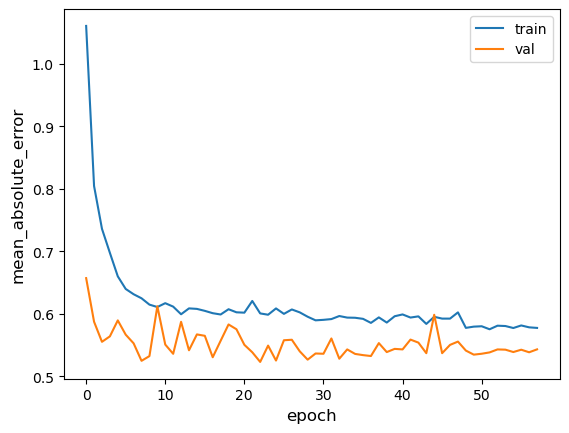

64/64 [==============================] - 0s 2ms/step - loss: 2.6392 - mean_absolute_error: 0.6316
Test accuracy 0.6316486597061157
Test loss 2.6392412185668945


In [123]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [124]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [125]:
rmse(y_test.values, y_test_pred)

0.07865770991468451

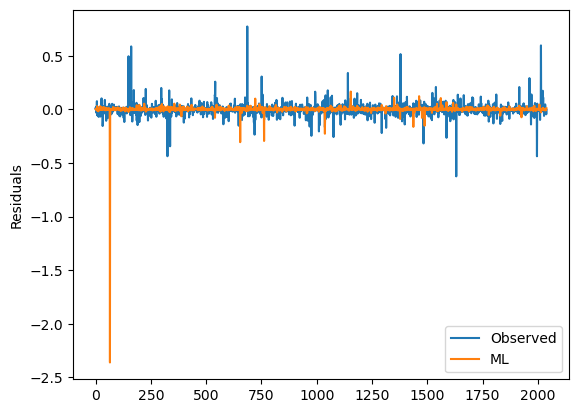

In [126]:
plt.plot(y_test.values, label='Observed')
plt.plot(y_test_pred, label='ML')
plt.ylabel('Residuals')
plt.legend()

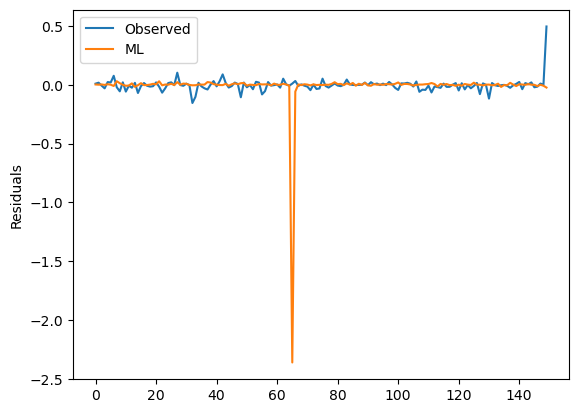

In [127]:
plt.plot(y_test.values[:150], label='Observed')
plt.plot(y_test_pred[:150], label='ML')
plt.ylabel('Residuals')
plt.legend()

Text(0, 0.5, 'Predicted residuals [N/m²]')

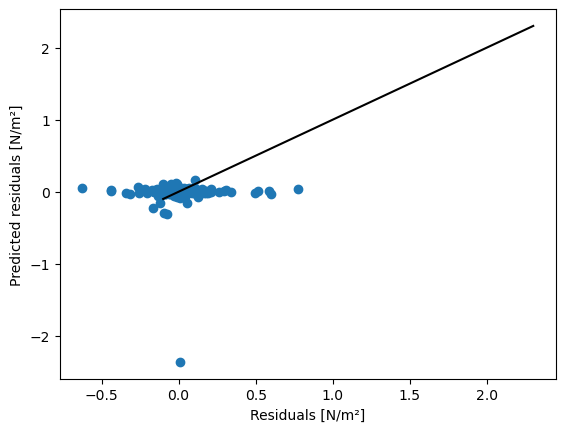

In [128]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

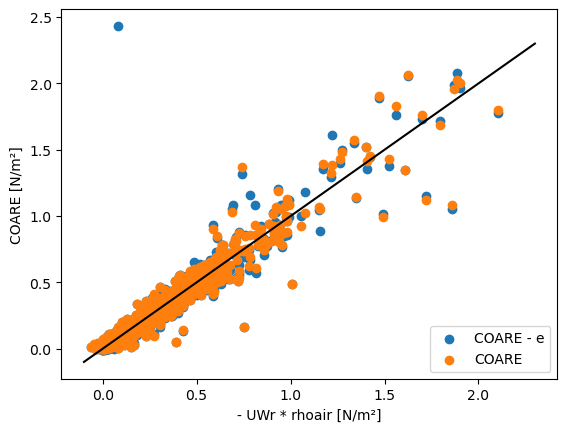

In [129]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [130]:
rmse(y_test.values, y_test_pred)

0.07865770991468451

In [131]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

0.07896266045858728

In [132]:
rmse(obs_test.values, c_test)

0.056241578532168816

## Correlation

In [133]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.00885532],
       [0.00885532, 1.        ]])

In [134]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

array([[1.        , 0.94990228],
       [0.94990228, 1.        ]])

In [135]:
np.corrcoef(obs_test.values, c_test)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [136]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [137]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [138]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 2s 131ms/step - loss: 21.2700 - mean_absolute_error: 2.9202 - val_loss: 0.8268 - val_mean_absolute_error: 0.5299
Epoch 2/500
6/6 [==============================] - 1s 104ms/step - loss: 2.5019 - mean_absolute_error: 1.1443 - val_loss: 0.8437 - val_mean_absolute_error: 0.5427
Epoch 3/500
6/6 [==============================] - 1s 109ms/step - loss: 2.8882 - mean_absolute_error: 1.1755 - val_loss: 0.8580 - val_mean_absolute_error: 0.5582
Epoch 4/500
6/6 [==============================] - 1s 105ms/step - loss: 2.3529 - mean_absolute_error: 1.0429 - val_loss: 0.9633 - val_mean_absolute_error: 0.6447
Epoch 5/500
6/6 [==============================] - 1s 103ms/step - loss: 2.0704 - mean_absolute_error: 0.9933 - val_loss: 0.8492 - val_mean_absolute_error: 0.5529
Epoch 6/500
6/6 [==============================] - 1s 103ms/step - loss: 1.7019 - mean_absolute_error: 0.9245 - val_loss: 0.8685 - val_mean_absolute_error: 0.5613
Epoch 7/500
6/6 [====

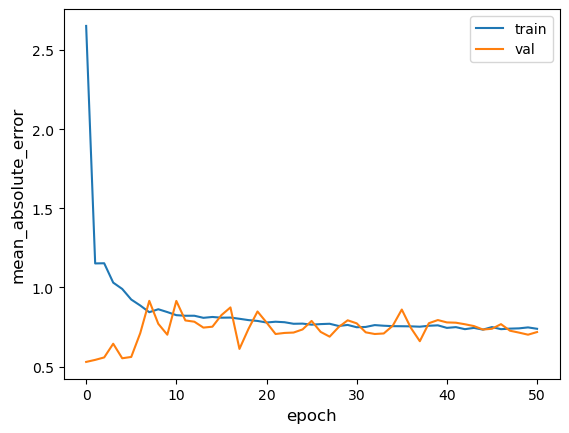

64/64 [==============================] - 0s 7ms/step - loss: 1.6034 - mean_absolute_error: 0.7645
Test accuracy 0.7644873261451721
Test loss 1.6034198999404907


In [139]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [140]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

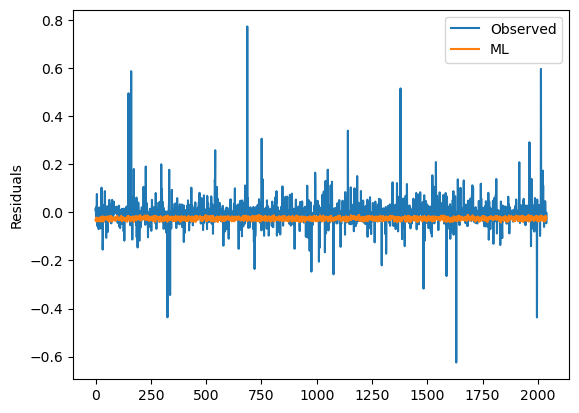

In [141]:
plt.plot(y_test.values, label='Observed')
plt.plot(y_test_pred, label='ML')
plt.ylabel('Residuals')
plt.legend()

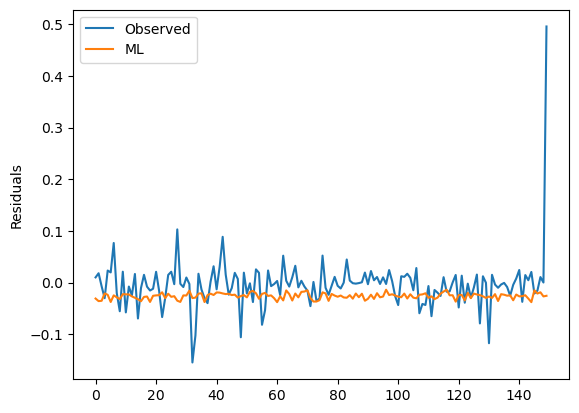

In [142]:
plt.plot(y_test.values[:150], label='Observed')
plt.plot(y_test_pred[:150], label='ML')
plt.ylabel('Residuals')
plt.legend()

Text(0, 0.5, 'Predicted residuals [N/m²]')

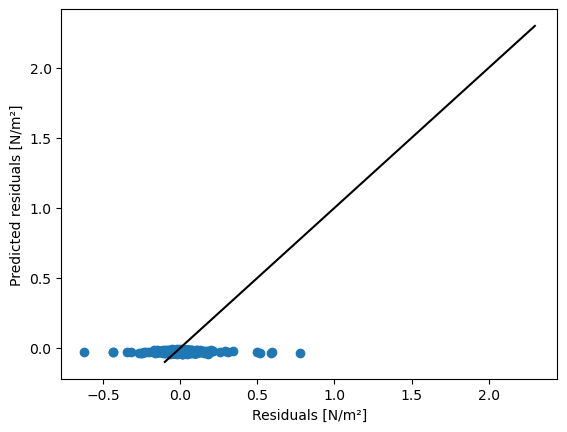

In [143]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Residuals [N/m²]') 
plt.ylabel('Predicted residuals [N/m²]') 

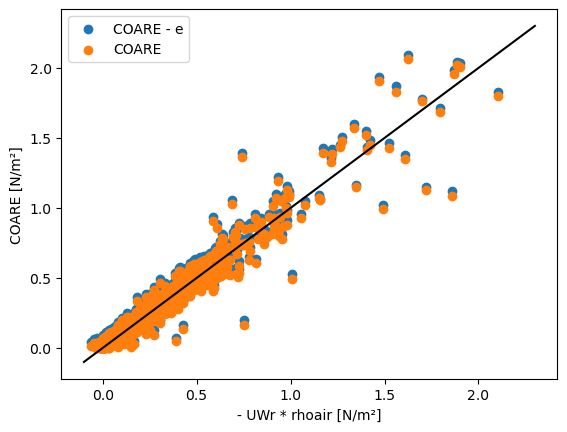

In [144]:
plt.scatter(obs_test.values, c_test.values - y_test_pred[:, 0], label='COARE - e')
plt.scatter(obs_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 
plt.legend()

In [145]:
rmse(y_test.values, y_test_pred)

0.06112156980051679

In [146]:
rmse(obs_test.values, c_test - y_test_pred[:, 0])

0.06270824399256614

In [147]:
rmse(obs_test.values, c_test)

0.056241578532168816

## Correlation

In [148]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.01533874],
       [0.01533874, 1.        ]])

In [149]:
np.corrcoef(obs_test.values, c_test - y_test_pred[:, 0])

array([[1.        , 0.97358422],
       [0.97358422, 1.        ]])

In [150]:
np.corrcoef(obs_test.values, c_test)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])